##Travel Recommendation System

Travel recommendation system utilizes users preferences and destination data to suggest personalized travel recommendations

##Importing Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Loading Datasets

In [3]:
tourism=pd.read_csv('tourism.csv')
rating=pd.read_csv('rating.csv')
user=pd.read_csv('user.csv')

In [4]:
tourism.head()

,Place_Id,Place_Name,Description,Category,City,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,4.5


In [5]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [6]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [7]:
num_places = len(tourism['Place_Id'].unique())
print("Number of places in the dataset:", num_places)

num_users = len(user['User_Id'].unique())
print("Number of users:", num_users)

num_ratings = len(rating)
print("Total number of ratings:", num_ratings)


Number of places in the dataset: 437
Number of users: 300
Total number of ratings: 10000


In [8]:
tourism.shape


(437, 6)

In [9]:
rating.shape

(10000, 3)

In [10]:
user.shape

(300, 3)

##Exploratory Data Analysis

In [11]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Rating       437 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 20.6+ KB


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [14]:
tourism.isnull().sum()

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Rating         0
dtype: int64

In [15]:
rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [16]:
user.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

##Data Preprocessing

In [17]:
import numpy as np
tourism_all = np.union1d(tourism['Place_Id'].unique(), rating['Place_Id'].unique())
total_tourism = len(tourism_all)
print("Total number of tourism:",total_tourism)

Total number of tourism: 437


##Deepcopy() of rating

In [18]:
all_tourism_rate = rating.copy()
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


##Merging two dataframes

In [19]:
all_tourism = pd.merge(all_tourism_rate,tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [20]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


##Data Preparation

In [21]:
all_tourism.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [22]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [23]:
prep = all_tourism.drop_duplicates(subset='Place_Id')
prep

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [24]:
place_id, place_name, place_category, place_desc, place_city, city_category = prep[['Place_Id', 'Place_Name', 'Category', 'Description', 'City', 'city_category']].values.T.tolist()

In [25]:
tourism_new = pd.DataFrame({
    "id": prep['Place_Id'],
    "name": prep['Place_Name'],
    "category": prep['Category'],
    "description": prep['Description'],
    "city": prep['City'],
    "city_category": prep['city_category']
})
tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
2008,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
2399,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
2448,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
2534,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


In [26]:
pip install Scikit-learn

You should consider upgrading via the 'c:\Users\sai priyanka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


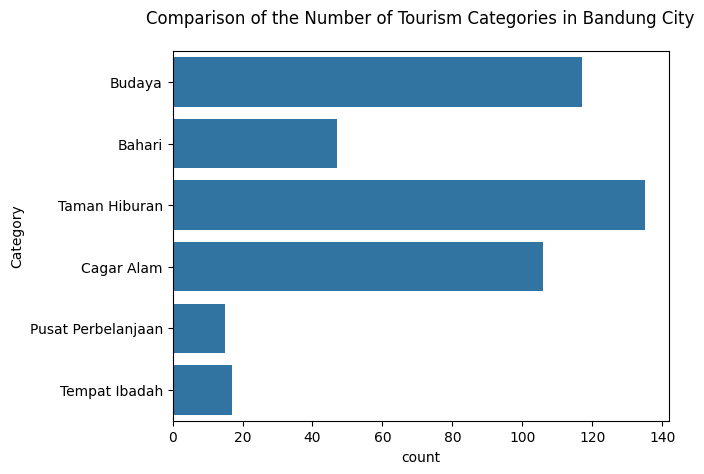

In [27]:
sns.countplot(y='Category', data=prep)
plt.title('Comparison of the Number of Tourism Categories in Bandung City', pad=20)
plt.show()

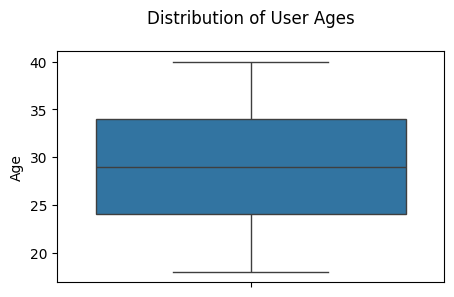

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribution of User Ages', pad=20)
plt.show()

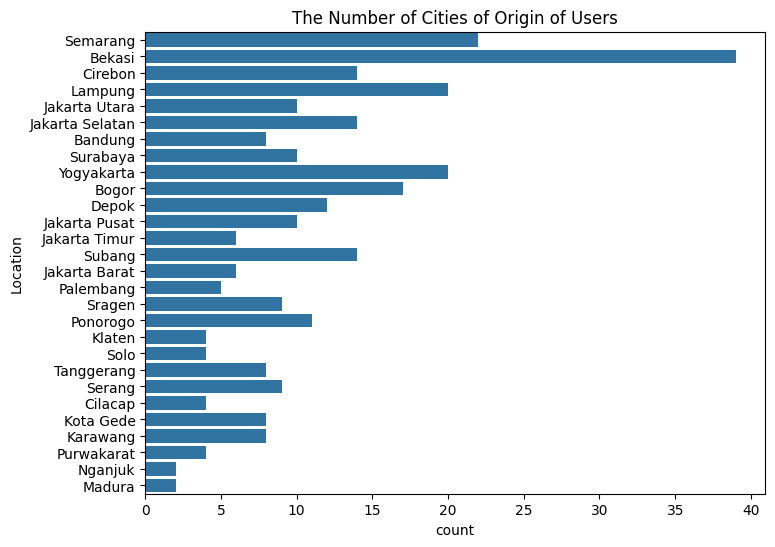

In [29]:
City_of_Origin= user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=City_of_Origin)
plt.title('The Number of Cities of Origin of Users')
plt.show()

##Content Based Filtering

In [30]:
ds = tourism_new
ds.sample(5)

,id,name,category,description,city,city_category
1463,232,Bukit Moko,Cagar Alam,Bandung sebagai destinasi wisata tak pernah ad...,Bandung,Bandung Cagar Alam
493,199,Pantai Sedahan,Bahari,Pantai Sedahan ini memiliki garis pantai yang ...,Yogyakarta,Yogyakarta Bahari
221,130,Studio Alam Gamplong,Taman Hiburan,Studio Gamplong atau Studio Alam Gamplong adal...,Yogyakarta,Yogyakarta Taman Hiburan
1518,314,Tafso Barn,Cagar Alam,Nama Punclut mungkin sudah cukup akrab di teli...,Bandung,Bandung Cagar Alam
261,225,Orchid Forest Cikole,Taman Hiburan,Orchid Forest Cikole Lembang sudah berdiri sej...,Bandung,Bandung Taman Hiburan


##CountVectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(ds['city_category'])
print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [32]:
cv_matrix = cv.transform(ds['city_category']) 
cv_matrix.shape

(437, 15)

##Converting Sparse mateix to dense matrix

In [33]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [34]:
df = pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index=ds['name']
)
df.sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Taman Barunawati,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
Rumah Batik,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
Pantai Timang,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Pulau Pari,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Watu Gunung Ungaran,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


##Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(cv_matrix)
cosine

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [36]:
cosine_sim = pd.DataFrame(cosine,index=ds['name'],columns=ds['name'])
cosine_sim.sample(5,axis=1).sample(10,axis=0)

name,Pantai Wediombo,Teras Cikapundung BBWS,Lava Bantal,Flower Farm Setiya Aji,Puncak Pinus Becici
name,,,,,
Taman Mundu,0.0,0.666667,0.0,0.000000,0.666667
Taman Begonia,0.0,0.333333,0.0,0.666667,0.000000
Skyrink - Mall Taman Anggrek,0.0,0.666667,0.0,0.000000,0.666667
Taman Balai Kota Bandung,0.0,1.000000,0.0,0.000000,0.666667
Museum Sepuluh Nopember Kota Surabaya,0.0,0.000000,0.5,0.000000,0.000000
Museum Sonobudoyo Unit I,0.5,0.000000,1.0,0.000000,0.408248
Istana Negara Republik Indonesia,0.0,0.000000,0.5,0.000000,0.000000
Taman Lapangan Banteng,0.0,0.666667,0.0,0.000000,0.666667
Gereja Katedral,0.0,0.000000,0.0,0.000000,0.000000


##Recommendation

In [37]:
def tourism_recommendations(place_name,similarity_data=cosine_sim,items=ds[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [38]:
tourism_recommendations("SnowBay Waterpark")

,name,category,description,city
0,Taman Impian Jaya Ancol,Taman Hiburan,Taman Impian Jaya Ancol merupakan sebuah objek...,Jakarta
1,Waterboom PIK (Pantai Indah Kapuk),Taman Hiburan,Waterbom Jakarta merupakan sebuah wahana perma...,Jakarta
2,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta
3,The Escape Hunt,Taman Hiburan,Escape Hunt adalah salah satu tempat rekreasi ...,Jakarta
4,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta


##Collaborative Filtering

In [39]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sai priyanka\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [40]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [41]:
df = rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


##Data Preparation

##Encoding

In [42]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [43]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [44]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [45]:
num_users = len(user_to_user_encoded)
num_place = len(place_encoded_to_place)
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
min_rating = min(df['Place_Ratings'])
max_rating= max(df['Place_Ratings'])
print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [46]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [47]:
x = df[['user','place']].values
y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values
train_indices = int(0.8 * df.shape[0])
x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


In [48]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1]) 
    place_bias = self.place_bias(inputs[:, 1]) 
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) 


In [49]:
model = RecommenderNet(num_users, num_place, 100)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [50]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6962 - root_mean_squared_error: 0.3475 - val_loss: 0.6965 - val_root_mean_squared_error: 0.3472
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6888 - root_mean_squared_error: 0.3415 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3478
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6825 - root_mean_squared_error: 0.3397 - val_loss: 0.6961 - val_root_mean_squared_error: 0.3469
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6790 - root_mean_squared_error: 0.3339 - val_loss: 0.6961 - val_root_mean_squared_error: 0.3469
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6725 - root_mean_squared_error: 0.3313 - val_loss: 0.6981 - val_root_mean_squared_error: 0.3482
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6698 - root_mean_squared_error: 0.3314 - val_loss: 0.6985 - val_root_mean_squared_error: 0.3485
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

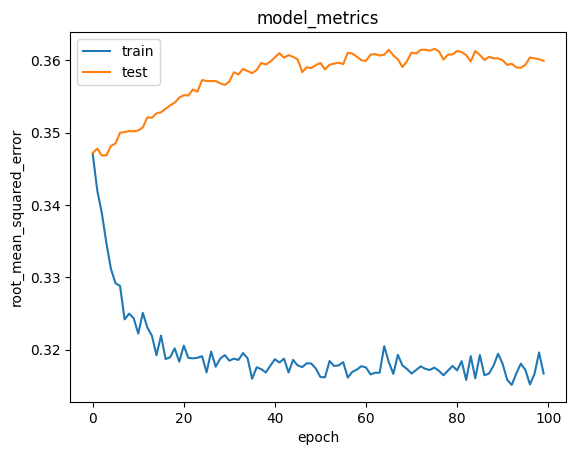

In [51]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
place_df = tourism_new
df = pd.read_csv('rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [53]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))

print('Place with high ratings from user :')

 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Showing recommendations for users: 155
Place with high ratings from user :


,id,name,category,description,city,city_category
57,321,Glamping Lakeside Rancabali,Taman Hiburan,Glamping Lakeside Rancabali menawarkan tempat ...,Bandung,Bandung Taman Hiburan
60,17,Museum Fatahillah,Budaya,Museum Fatahillah memiliki nama resmi Museum S...,Jakarta,Jakarta Budaya
85,228,Museum Sri Baduga,Budaya,Museum Sri Baduga merupakan sebuah museum yang...,Bandung,Bandung Budaya
524,332,Rainbow Garden,Cagar Alam,Rainbow Garden Harapan Indah salah satu taman ...,Bandung,Bandung Cagar Alam
647,209,Pantai Sanglen,Bahari,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Yogyakarta,Yogyakarta Bahari


##Recommendation

In [54]:
print('Top 10 place recommendation')
recommended= place_df[place_df['id'].isin(recommended_place_ids)]
recommended

Top 10 place recommendation


,id,name,category,description,city,city_category
45,407,Taman Ekspresi Dan Perpustakaan,Taman Hiburan,Taman Ekspresi Surabaya tidak hanya menyuguhka...,Surabaya,Surabaya Taman Hiburan
118,395,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya,Surabaya Taman Hiburan
174,379,Goa Rong,Cagar Alam,Semarang memiliki wisata di ketinggian bernama...,Semarang,Semarang Cagar Alam
254,416,Keraton Surabaya,Budaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Surabaya,Surabaya Budaya
554,399,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya,Surabaya Taman Hiburan
862,353,Taman Srigunting,Taman Hiburan,Merupakan salah satu landmark di Kawasan Kota ...,Semarang,Semarang Taman Hiburan
865,401,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya,Surabaya Taman Hiburan
878,364,Water Blaster Bukit Candi Golf,Taman Hiburan,Buat kamu yang bingung mau rekreasi kemana di ...,Semarang,Semarang Taman Hiburan
1038,388,Watu Gunung Ungaran,Cagar Alam,Objek wisata alam memang sangat cocok dikunjun...,Semarang,Semarang Cagar Alam
1379,387,Obyek Wisata Goa Kreo,Cagar Alam,Goa Kreo Semarang yang berada di ibukota Jawa ...,Semarang,Semarang Cagar Alam


##Saving Model

In [55]:
import joblib

In [56]:
joblib.dump(cosine_sim,'COSINE_SIMILARITY.pkl')

['COSINE_SIMILARITY.pkl']

In [57]:
items=ds[['name','category','description','city']]

In [58]:
joblib.dump(items,'DATA_ITEMS.pkl')

['DATA_ITEMS.pkl']

In [59]:
import joblib
import pandas as pd
cosine=joblib.load('COSINE_SIMILARITY.pkl')
item=joblib.load('DATA_ITEMS.pkl')
def tourism_recommendations(place_name):
    try:
        k=5
        similarity_data=cosine
        items=item
        index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        closest = closest.drop(place_name,errors='ignore')
        df=pd.DataFrame(closest).merge(items).head(k)
        return df
    except KeyError:
        return "Sorry!No data found"

In [60]:
input_data=input("Enter the location:")
print(input_data)
tourism_recommendations(input_data)

In [ ]:
input_data=input("Enter the location:")
print(input_data)
tourism_recommendations(input_data)

dubai


'Sorry!No data found'